In [1]:
import torch
import numpy as np
from ANN_model import Taipei_features12_NN
from Dataset import Features12_dataset
from Utils import loss_plot
from torch.utils.data import DataLoader
from Train import train_model

c:\Users\smcmlab4\Anaconda3\envs\python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
BATCH_SIZE = 32
RANDOM_STATE = 42

X = np.load('Grouped_by_city/taipei_features12_train.npy')
y = np.load('Grouped_by_city/taipei_target_train.npy')


train_dataset = Features12_dataset(X, y, train=True, random_state=RANDOM_STATE)
test_dataset = Features12_dataset(X, y, train=False, random_state=RANDOM_STATE)
print('Total num of data:', train_dataset.__len__()+test_dataset.__len__())
y_scaler_train = train_dataset.get_y_scaler()
y_scaler_test = test_dataset.get_y_scaler()

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=test_dataset.__len__(), shuffle=False)

Total num of data: 2382


In [3]:
model = Taipei_features12_NN()
model_trained, trainloss, testloss = train_model(model, train_loader, test_loader, y_scaler_train, y_scaler_test, num_epochs=500, lr=0.01, weight_decay=1e-4, factor=0.5, min_lr=1e-6, patience=50, threshold=0.001)

[Epoch 1/500] train_loss: 0.099492, test_loss: 0.019845 | train_mape: 140.2593, test_mape: 19.3442
[Epoch 2/500] train_loss: 0.018636, test_loss: 0.015820 | train_mape: 20.3065, test_mape: 17.1158
[Epoch 3/500] train_loss: 0.016219, test_loss: 0.012190 | train_mape: 18.6727, test_mape: 15.7229
[Epoch 4/500] train_loss: 0.014710, test_loss: 0.011627 | train_mape: 17.6787, test_mape: 14.5636
[Epoch 5/500] train_loss: 0.012322, test_loss: 0.009348 | train_mape: 16.4341, test_mape: 14.5276
[Epoch 6/500] train_loss: 0.012101, test_loss: 0.009976 | train_mape: 16.0622, test_mape: 13.5805
[Epoch 7/500] train_loss: 0.010684, test_loss: 0.007783 | train_mape: 15.2995, test_mape: 13.0274
[Epoch 8/500] train_loss: 0.009655, test_loss: 0.007908 | train_mape: 14.4816, test_mape: 12.9778
[Epoch 9/500] train_loss: 0.010008, test_loss: 0.008068 | train_mape: 14.8421, test_mape: 12.0726
[Epoch 10/500] train_loss: 0.010506, test_loss: 0.007271 | train_mape: 15.1441, test_mape: 12.3826
[Epoch 11/500] tra

In [4]:
from Utils import save_with_unique_name 
#### 記得改檔名 ####
filename = 'Models/taipei_features12_model1.pt'
filename = save_with_unique_name(filename)
torch.save(model_trained.state_dict(), filename)

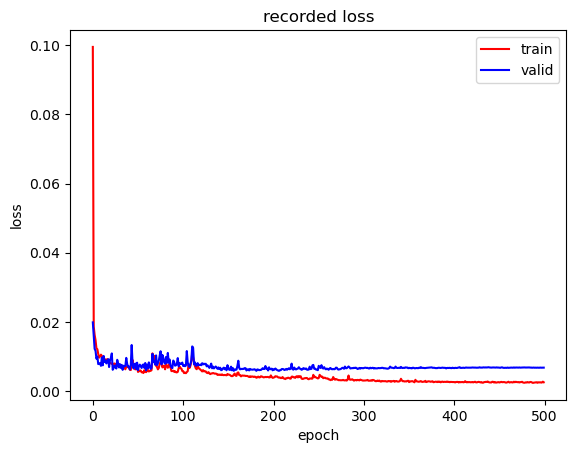

In [5]:
loss_plot(trainloss, testloss)

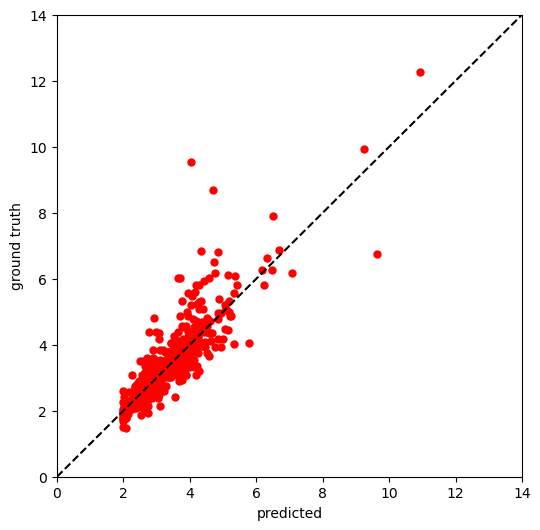

In [6]:
from Utils import true_pred_plot, model_pred

pred_test, true_test = model_pred(model_trained, test_loader, y_scaler_test)
true_pred_plot(pred_test, true_test)

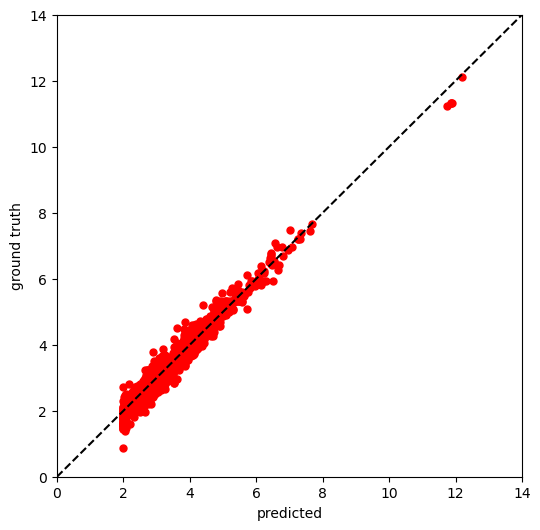

In [7]:
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=False)
pred_train, true_train = model_pred(model_trained, train_loader, y_scaler_train)
true_pred_plot(pred_train, true_train)